# Dominios de funciones

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pares = [2*i for i in range(11)]
pares

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]

In [3]:
impares = [2*i+1 for i in range(11)]
impares

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

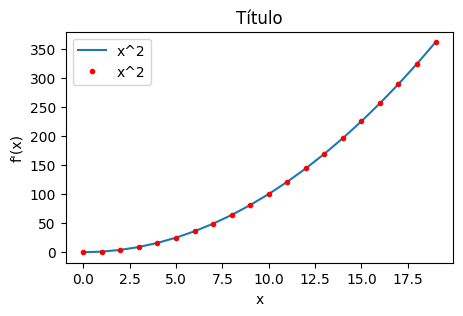

In [4]:
cuad = [i**2 for i in range(20)]

plt.figure(figsize=(5,3))
plt.plot(range(20),cuad,label="x^2")
plt.plot(range(20),cuad,'r.',label="x^2")
# plt.scatter(range(20),cuad,label="x^2")
plt.xlabel("x")
plt.ylabel("f'(x)")
plt.title("Título")
plt.legend()

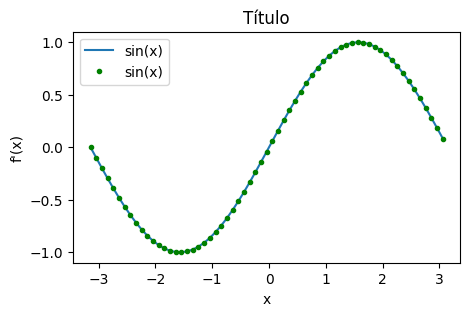

In [5]:
dom1 = np.arange(-np.pi,np.pi,0.1)
sen1 = [np.sin(i) for i in dom1]

plt.figure(figsize=(5,3))
plt.plot(dom1,sen1,label="sin(x)")
plt.plot(dom1,sen1,'g.',label="sin(x)")
plt.xlabel("x")
plt.ylabel("f'(x)")
plt.title("Título")
plt.legend()

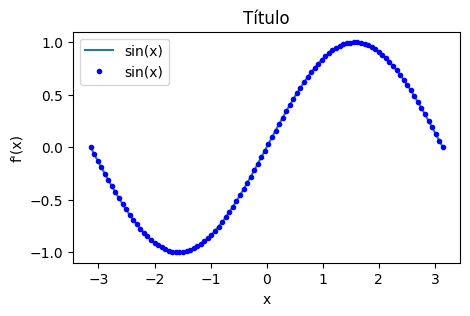

In [6]:
dom2 = np.linspace(-np.pi,np.pi,100)
ejemplo = np.sin(dom2)
sen2 = [np.sin(i) for i in dom2]

plt.figure(figsize=(5,3))
plt.plot(dom2,ejemplo,label="sin(x)")
plt.plot(dom2,ejemplo,'b.',label="sin(x)")
plt.xlabel("x")
plt.ylabel("f'(x)")
plt.title("Título")
plt.legend()

## Mapas de calor, curvas de nivel, diagramas de flujo y campos vectoriales.

Text(0.5, 1.0, 'Título')

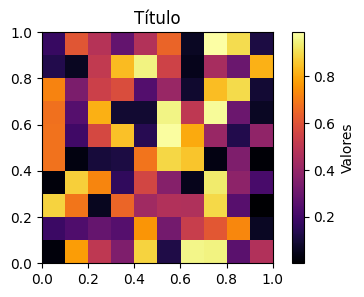

In [7]:
M = np.random.rand(10,10)
plt.figure(figsize=(5,3))
plt.imshow(M,cmap='inferno',extent=[0,1,0,1])
plt.colorbar(label="Valores")
plt.title("Título")

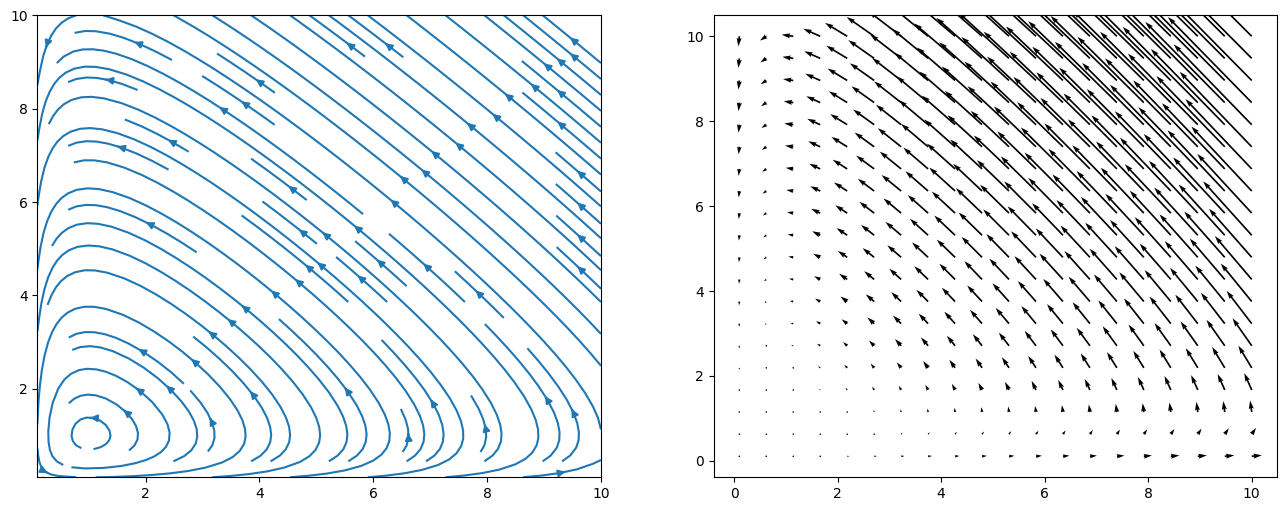

In [8]:
xs = np.linspace(0.1,10,20)
ys = np.linspace(0.1,10,20)
X , Y = np.meshgrid(xs,ys)

u = X-X*Y #f(x,y)
v = X*Y-Y #g(x,y)

plt.figure(figsize=(16, 6))
plt.subplot(1,2,1)
plt.streamplot(xs,ys,u,v)

plt.subplot(1,2,2)
plt.quiver(xs,ys,u,v,scale=500,width=0.003)

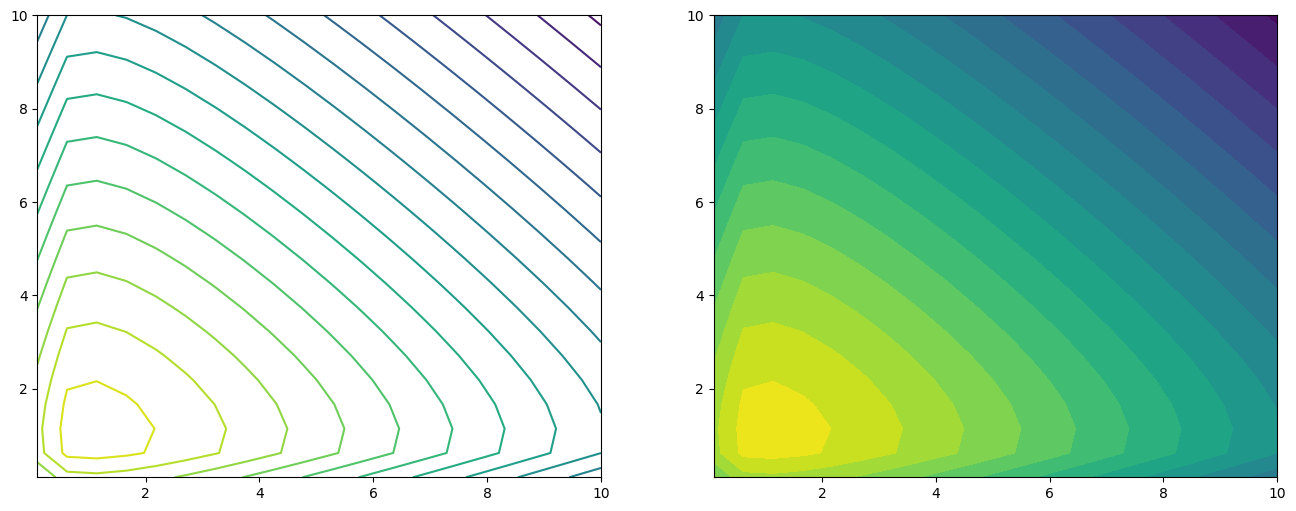

In [9]:
xs = np.linspace(0.1,10,20)
ys = np.linspace(0.1,10,20)
X , Y = np.meshgrid(xs,ys)

Z = np.log(Y)+np.log(X)-X-Y

plt.figure(figsize=(16, 6))
plt.subplot(1,2,1)
plt.contour(xs,ys,Z,levels=20)

plt.subplot(1,2,2)
plt.contourf(xs,ys,Z,levels=20)

## Ejercicio: potencial y campo eléctrico de un dipolo eléctrico

Calcular el potencial y campo eléctrico de un dipolo elétrico. Para ello se sabe que 

$$V(x,y) =  \frac{1}{4\pi\epsilon_0}\left(\frac{q}{r_+}-\frac{q}{r_-}\right)$$

y que además $E = -\nabla V$. Pero aún no hemos visto diferenciación numérica. Pero se sabe que considerando que la distancia entre cargas es menor a $r$

$$E(x,y) = E_+ + E_- =  \frac{1}{4\pi\epsilon_0}\left(\frac{q}{r_+^2}-\frac{q}{r_-^2}\right)$$

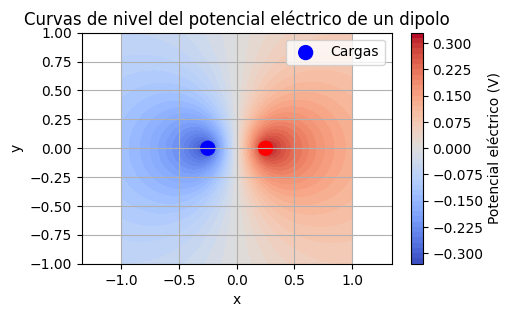

In [10]:
q = 1      
d = 0.5    
k = 1 / (4 * np.pi * 8.854e-12)  # constante de Coulomb 

xs = np.linspace(-1, 1, 100)
ys = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(xs, ys)

# Posiciones de las cargas
r_pos  = np.sqrt((X - d/2)**2 + Y**2)+1
r_neg = np.sqrt((X + d/2)**2 + Y**2)+1

# Potencial eléctrico
V = q / r_pos - q / r_neg

# Graficar curvas de nivel
plt.figure(figsize=(5, 3))
contours = plt.contourf(X, Y, V, levels=50, cmap='coolwarm')
plt.colorbar(label='Potencial eléctrico (V)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Curvas de nivel del potencial eléctrico de un dipolo')
plt.scatter([-d/2, d/2], [0, 0], c=['blue', 'red'], s=100, label='Cargas')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

Text(0.5, 1.0, 'quiver')

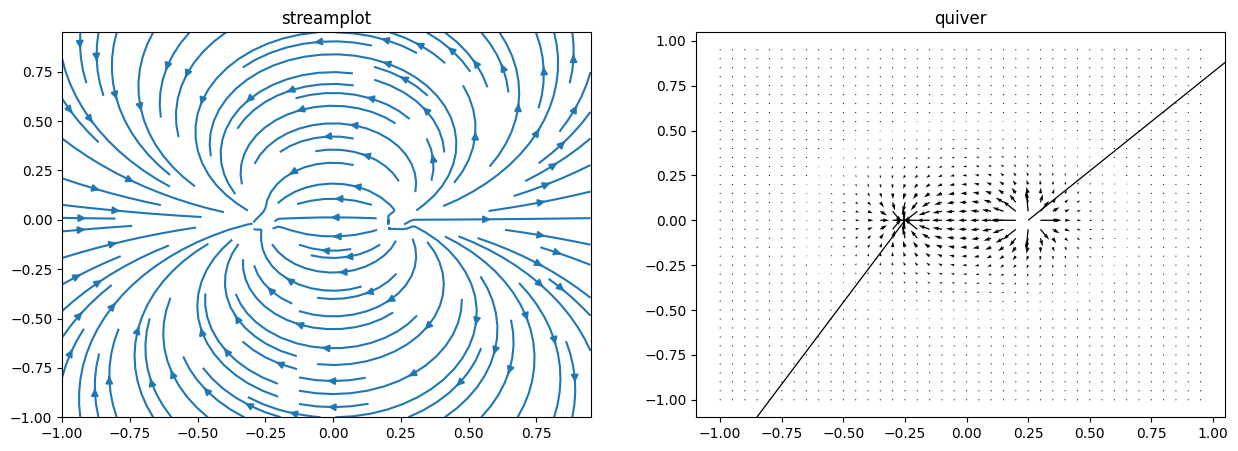

In [11]:
#Utilizando quiver y streamplot
X,Y = np.meshgrid( np.arange(-1,1,0.05), np.arange(-1,1,0.05) )
epsilon = 1e-9

r_pos  = np.sqrt((X - d/2)**2 + Y**2)+epsilon
r_neg = np.sqrt((X + d/2)**2 + Y**2)+epsilon

Ex = (X - 0.25)/r_pos**2 - (X + 0.25)/r_neg**2
Ey = Y/r_pos**2 - Y/r_neg**2

fig, (ax1,ax2) = plt.subplots(1,2,figsize = (15,5))

ax1.streamplot(X,Y,Ex,Ey)
ax1.set_title('streamplot')

ax2.quiver(X,Y,Ex,Ey,scale=500)
ax2.set_title('quiver')
